In [42]:
import pandas as pd
import numpy as np
df_train = pd.read_csv('train.csv')

In [2]:
df_train.head(10)

,PassengerId,label,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
# 查看相关系数
df_train.corr()

,PassengerId,label,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
label,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [4]:
# 等频切分
df_train.loc[:,'fare_qcut'] = pd.qcut(df_train["Fare"],10)
df_train.head(10)

,PassengerId,label,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fare_qcut
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(-0.001, 7.55]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(39.688, 77.958]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(7.854, 8.05]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(39.688, 77.958]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(7.854, 8.05]"
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,"(8.05, 10.5]"
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,"(39.688, 77.958]"
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,"(14.454, 21.679]"
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,"(10.5, 14.454]"
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,"(27.0, 39.688]"


In [5]:
# 等频切分
df_train = df_train.sort_values('Fare')
alist = list(set(df_train['fare_qcut']))
print(alist)
print("-----------")
print(df_train)


[Interval(39.688, 77.958, closed='right'), Interval(14.454, 21.679, closed='right'), Interval(8.05, 10.5, closed='right'), Interval(7.55, 7.854, closed='right'), Interval(10.5, 14.454, closed='right'), Interval(77.958, 512.329, closed='right'), Interval(-0.001, 7.55, closed='right'), Interval(27.0, 39.688, closed='right'), Interval(7.854, 8.05, closed='right'), Interval(21.679, 27.0, closed='right')]
-----------
     PassengerId  label  Pclass  \
271          272      1       3   
597          598      0       3   
302          303      0       3   
633          634      0       1   
277          278      0       2   
413          414      0       2   
674          675      0       2   
263          264      0       1   
466          467      0       2   
732          733      0       2   
179          180      0       3   
806          807      0       1   
481          482      0       2   
822          823      0       1   
815          816      0       1   
378          379      0 

In [6]:

badrate = {}
for x in alist:
    
    a = df_train[df_train.fare_qcut == x]
    
    bad = a[a.label == 1]['label'].count()
    good = a[a.label == 0]['label'].count()
    
    badrate[x] = bad/(bad+good)



In [7]:
print(bad)
print(good)
print(badrate)
print("---------")
print(badrate[x])

46
43
{Interval(39.688, 77.958, closed='right'): 0.5280898876404494, Interval(14.454, 21.679, closed='right'): 0.42045454545454547, Interval(8.05, 10.5, closed='right'): 0.23076923076923078, Interval(7.55, 7.854, closed='right'): 0.2988505747126437, Interval(10.5, 14.454, closed='right'): 0.42857142857142855, Interval(77.958, 512.329, closed='right'): 0.7586206896551724, Interval(-0.001, 7.55, closed='right'): 0.14130434782608695, Interval(27.0, 39.688, closed='right'): 0.37362637362637363, Interval(7.854, 8.05, closed='right'): 0.1792452830188679, Interval(21.679, 27.0, closed='right'): 0.5168539325842697}
---------
0.5168539325842697


In [8]:
f = zip(badrate.keys(),badrate.values())
f = sorted(f,key = lambda x : x[1],reverse = True )
badrate = pd.DataFrame(f)
badrate.columns = pd.Series(['cut','badrate'])
badrate = badrate.sort_values('cut')
print(badrate)
badrate.plot('cut','badrate')

                 cut   badrate
9     (-0.001, 7.55]  0.141304
6      (7.55, 7.854]  0.298851
8      (7.854, 8.05]  0.179245
7       (8.05, 10.5]  0.230769
3     (10.5, 14.454]  0.428571
4   (14.454, 21.679]  0.420455
2     (21.679, 27.0]  0.516854
5     (27.0, 39.688]  0.373626
1   (39.688, 77.958]  0.528090
0  (77.958, 512.329]  0.758621


In [47]:
def m(x):
    if x<10.5:
        return 0
    elif x<39.688:
        return 1
    else:
        return 2
df_train["fare_cut_nev"] = df_train.Fare.map(lambda x:m(x))

In [49]:
# 等频切分

df_train = df_train.sort_values('Fare')
alist = list(set(df_train['fare_cut_nev']))

badrate = {}
for x in alist:
    
    a = df_train[df_train.fare_cut_nev == x]
    
    bad = a[a.label == 1]['label'].count()
    good = a[a.label == 0]['label'].count()
    
    badrate[x] = bad/(bad+good)

   cut   badrate
2    0  0.197640
1    1  0.430851
0    2  0.642045


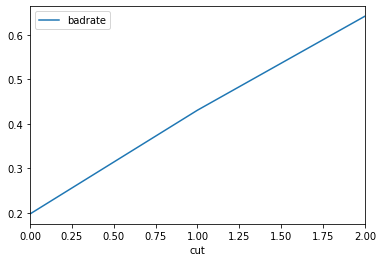

In [50]:
f = zip(badrate.keys(),badrate.values())
f = sorted(f,key = lambda x : x[1],reverse = True )
badrate = pd.DataFrame(f)
badrate.columns = pd.Series(['cut','badrate'])
badrate = badrate.sort_values('cut')
print(badrate)
badrate.plot('cut','badrate')
# print(df_train) 

In [ ]:
上面一条是曲线  有波动   新的没有的波动   逻辑回归变量不能有线性关系  
但是要的结果是线性关系的
一开始是曲线就是因为分箱分的不好  他是用于顺序分箱的   有大有小   之后在进行自己分一下
